In [1]:
import pyspark
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import * 
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local") \
    .appName("CreditRisk") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [3]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
import xgboost as xgb
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

In [4]:
spark = SparkSession.builder \
    .appName("XGBoost Loan Prediction") \
    .config("spark.jars.packages", "ml.dmlc:xgboost4j-spark_2.12:1.7.5") \
    .getOrCreate()


In [6]:
df = spark.read.csv("C:/Users/yamin/OneDrive/Desktop/BD/CreditRisk (1).csv", inferSchema = True, header = True, sep=',')


In [7]:
df = df.withColumn('Married', when(col('Married')=='No', 0).otherwise(1))
df = df.withColumn('Education', when(col('Education')=='Not Graduate', 0).otherwise(1))
df = df.withColumn('Self_Employed', when(col('Self_Employed')=='No', 0).otherwise(1))
df = df.withColumn('Married', when(col('Married')=='No', 0).otherwise(1))
df = df.withColumn('Education', when(col('Education')=='Not Graduate', 0).otherwise(1))
df = df.withColumn('Loan_Status', when(col('Loan_Status')=='N', 0).otherwise(1))
df = df.withColumn('Self_Employed', when(col('Self_Employed')=='No', 0).otherwise(1))
df = df.na.drop()
df = df.drop('Loan_ID','Gender','Property_Area')

In [8]:
df = df.withColumn('Married', when(col('Married')=='No', 0).otherwise(1))
df = df.withColumn('Education', when(col('Education')=='Not Graduate', 0).otherwise(1))
df = df.withColumn('Self_Employed', when(col('Self_Employed')=='No', 0).otherwise(1))
df = df.withColumn('Married', when(col('Married')=='No', 0).otherwise(1))
df = df.withColumn('Education', when(col('Education')=='Not Graduate', 0).otherwise(1))
df = df.withColumn('Loan_Status', when(col('Loan_Status')=='N', 0).otherwise(1))
df = df.withColumn('Self_Employed', when(col('Self_Employed')=='No', 0).otherwise(1))
df = df.na.drop()
df = df.drop('Loan_ID','Gender','Property_Area')

In [9]:
df = df.select(col('Dependents').cast('int').alias('Dependents'),
              'Education',
              'Self_Employed',
              'ApplicantIncome',
              'CoapplicantIncome',
              'LoanAmount',
              'Loan_Amount_Term',
              'Credit_History',
              'Loan_Status')

In [10]:
import pandas as pd
## gather numerical features
data = df.drop("Education","Self_Employed")
numerical_features = [t[0] for t in data.dtypes if t[1] == 'int' or t[1]=='double']
df_numeric = data.select(numerical_features).describe().toPandas().transpose()
df_numeric
data1 = data

In [11]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from xgboost import XGBClassifier
from pyspark.sql import functions as F
import pandas as pd


In [13]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, when

import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Initialize Spark session
spark = SparkSession.builder.appName("XGBoostClassification").getOrCreate()

# Step 2: Load and Preprocess Data
df = spark.read.csv("C:/Users/yamin/OneDrive/Desktop/BD/CreditRisk (1).csv", header=True, inferSchema=True)

# Example preprocessing (adjust as needed)
df = df.withColumn('Married', when(col('Married')=='No', 0).otherwise(1))
df = df.withColumn('Education', when(col('Education')=='Not Graduate', 0).otherwise(1))
df = df.withColumn('Self_Employed', when(col('Self_Employed')=='No', 0).otherwise(1))
df = df.withColumn('Loan_Status', when(col('Loan_Status')=='N', 0).otherwise(1))

# Remove unnecessary columns
df = df.drop('Loan_ID', 'Gender', 'Property_Area')

# Handle missing values by dropping rows with nulls
df = df.na.drop()

# Step 3: Assemble Features
feature_columns = [col for col in df.columns if col not in ['Loan_Status']]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Step 4: Convert to Pandas DataFrame for XGBoost
# Convert the features column (vector) to an array of floats and collect the data
pandas_df = df_assembled.select("Loan_Status", "features").toPandas()

# Convert the feature vectors to numpy arrays
X = np.array([x.toArray() for x in pandas_df['features']])
y = pandas_df['Loan_Status'].values

# Step 5: Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define and Train XGBoost Model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'eta': 0.1,
    'silent': 1
}

# Train the model
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Step 7: Make Predictions
y_pred = model.predict(dtest)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary

# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")


C:\Users\yamin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:39:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.8690


Before SMOTE:
1    571
0    213
Name: count, dtype: int64

After SMOTE:
1    571
0    571
Name: count, dtype: int64


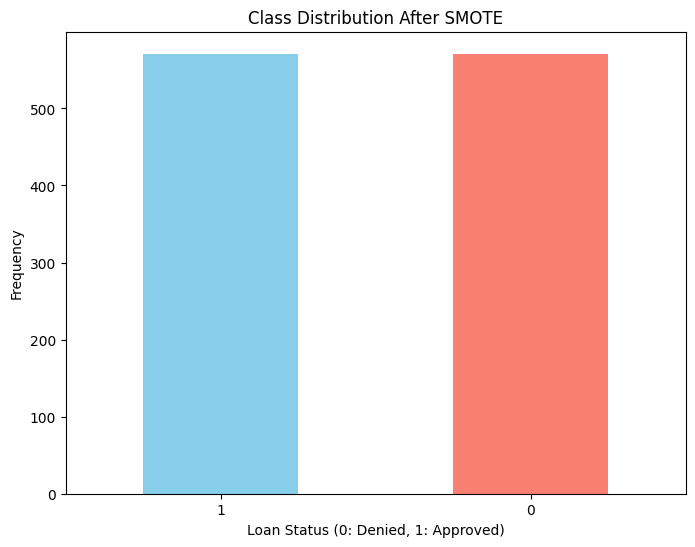

In [14]:
# Import required libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual dataset)
df = pd.read_csv('C:/Users/yamin/OneDrive/Desktop/BD/CreditRisk (1).csv')

# Assuming 'X' are features and 'Loan_Status' is the target variable
X = df.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df['Loan_Status']  # Target variable (Loan_Status)

# Encode 'Loan_Status' as it might contain categorical values (e.g., 'approved', 'denied')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts categorical 'Loan_Status' to numeric (e.g., 'approved' -> 1, 'denied' -> 0)

# Handle categorical columns in X (features) by encoding them if necessary
# For label encoding of features (if needed)
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Handle missing values (NaN) by using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean value of the column
X = imputer.fit_transform(X)  # Apply the imputer on features

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)  # auto means balance all classes
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after SMOTE
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Plot class distribution after SMOTE
plt.figure(figsize=(8, 6))
pd.Series(y_train_res).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Loan Status (0: Denied, 1: Approved)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


C:\Users\yamin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:39:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.8690
XGBoost Model Precision: 0.8696
XGBoost Model Recall: 0.9677
Confusion Matrix:
 [[ 26  18]
 [  4 120]]


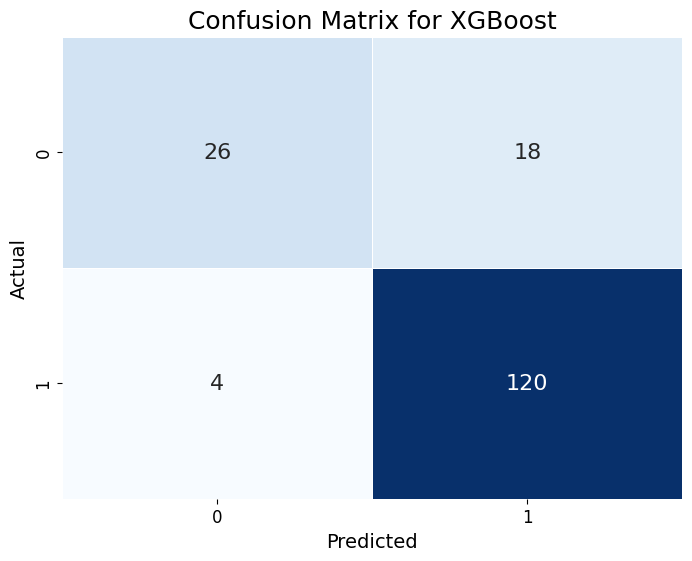

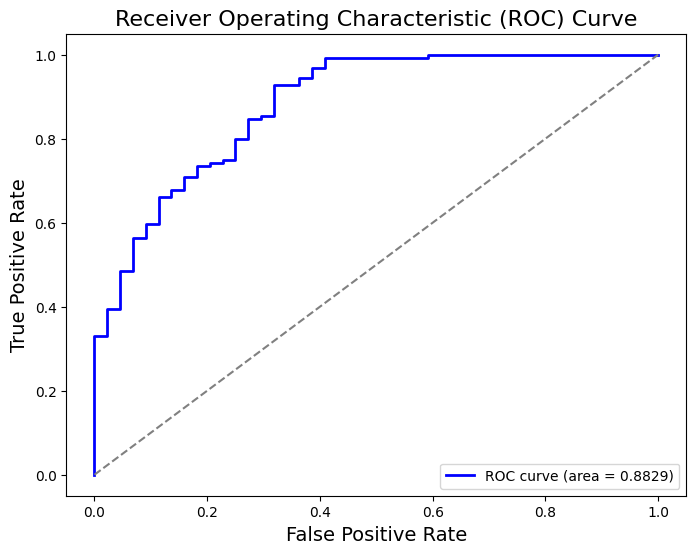

In [15]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, when

import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize Spark session
spark = SparkSession.builder.appName("XGBoostClassification").getOrCreate()

# Step 2: Load and Preprocess Data
df = spark.read.csv("C:/Users/yamin/OneDrive/Desktop/BD/CreditRisk (1).csv", header=True, inferSchema=True)

# Example preprocessing (adjust as needed)
df = df.withColumn('Married', when(col('Married')=='No', 0).otherwise(1))
df = df.withColumn('Education', when(col('Education')=='Not Graduate', 0).otherwise(1))
df = df.withColumn('Self_Employed', when(col('Self_Employed')=='No', 0).otherwise(1))
df = df.withColumn('Loan_Status', when(col('Loan_Status')=='N', 0).otherwise(1))

# Remove unnecessary columns
df = df.drop('Loan_ID', 'Gender', 'Property_Area')

# Handle missing values by dropping rows with nulls
df = df.na.drop()

# Step 3: Assemble Features
feature_columns = [col for col in df.columns if col not in ['Loan_Status']]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Step 4: Convert to Pandas DataFrame for XGBoost
# Convert the features column (vector) to an array of floats and collect the data
pandas_df = df_assembled.select("Loan_Status", "features").toPandas()

# Convert the feature vectors to numpy arrays
X = np.array([x.toArray() for x in pandas_df['features']])
y = pandas_df['Loan_Status'].values

# Step 5: Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define and Train XGBoost Model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'eta': 0.1,
    'silent': 1
}

# Train the model
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Step 7: Make Predictions
y_pred = model.predict(dtest)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary

# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

print(f"XGBoost Model Accuracy: {accuracy:.4f}")
print(f"XGBoost Model Precision: {precision:.4f}")
print(f"XGBoost Model Recall: {recall:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16}, linewidths=0.5)
plt.title('Confusion Matrix for XGBoost', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Step 10: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()


In [92]:
import pyspark
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import * 
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

C:\Users\yamin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:40:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.8810
Voting Classifier Precision: 0.8662
Voting Classifier Recall: 0.9919
Confusion Matrix:
 [[ 25  19]
 [  1 123]]


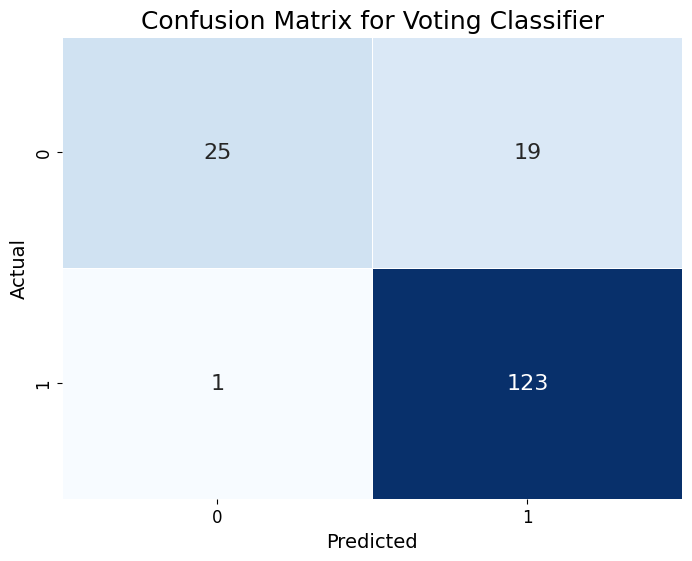

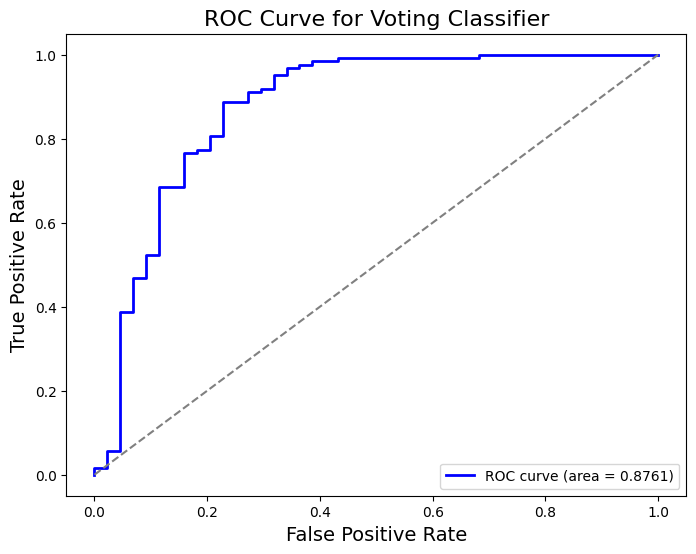

In [16]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col, when
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression  # Correct import for Logistic Regression
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize Spark session
spark = SparkSession.builder.appName("VotingClassifier").getOrCreate()

# Step 2: Load and preprocess data
df = spark.read.csv("C:/Users/yamin/OneDrive/Desktop/BD/CreditRisk (1).csv", header=True, inferSchema=True)

# Example preprocessing
df = df.withColumn('Married', when(col('Married') == 'No', 0).otherwise(1))
df = df.withColumn('Education', when(col('Education') == 'Not Graduate', 0).otherwise(1))
df = df.withColumn('Self_Employed', when(col('Self_Employed') == 'No', 0).otherwise(1))
df = df.withColumn('Loan_Status', when(col('Loan_Status') == 'N', 0).otherwise(1))

# Drop unnecessary columns
df = df.drop('Loan_ID', 'Gender', 'Property_Area')

# Handle missing values
df = df.na.drop()

# Assemble features
feature_columns = [col for col in df.columns if col not in ['Loan_Status']]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Convert to Pandas DataFrame for scikit-learn
pandas_df = df_assembled.select("Loan_Status", "features").toPandas()

# Convert the features column to numpy arrays
X = np.array([x.toArray() for x in pandas_df['features']])
y = pandas_df['Loan_Status'].values

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define individual classifiers
# Logistic Regression
lr = LogisticRegression(max_iter=1000)  # Added max_iter for convergence

# XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=6, eta=0.1)

# Step 5: Combine classifiers into VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb_clf)], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = voting_clf.predict(X_test)

# Step 7: Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Voting Classifier Accuracy: {accuracy:.4f}")
print(f"Voting Classifier Precision: {precision:.4f}")
print(f"Voting Classifier Recall: {recall:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16}, linewidths=0.5)
plt.title('Confusion Matrix for Voting Classifier', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot ROC Curve
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Voting Classifier', fontsize=16)
plt.legend(loc='lower right')
plt.show()


Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\yamin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yamin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Best Logistic Regression parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\yamin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:40:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\yamin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:40:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\yamin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:40:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,

Best XGBoost parameters: {'eta': 0.01, 'max_depth': 4, 'n_estimators': 100}
Tuned Voting Classifier Accuracy: 0.8750
Tuned Voting Classifier Precision: 0.8601
Tuned Voting Classifier Recall: 0.9919
Confusion Matrix:
 [[ 24  20]
 [  1 123]]


C:\Users\yamin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:40:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


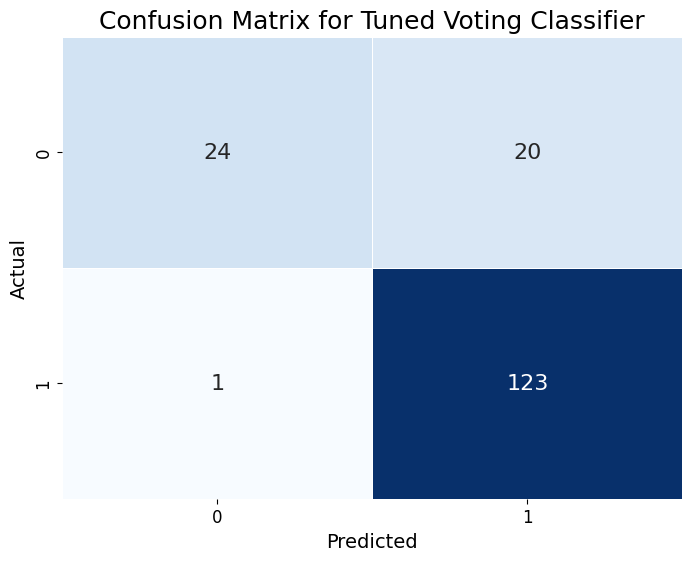

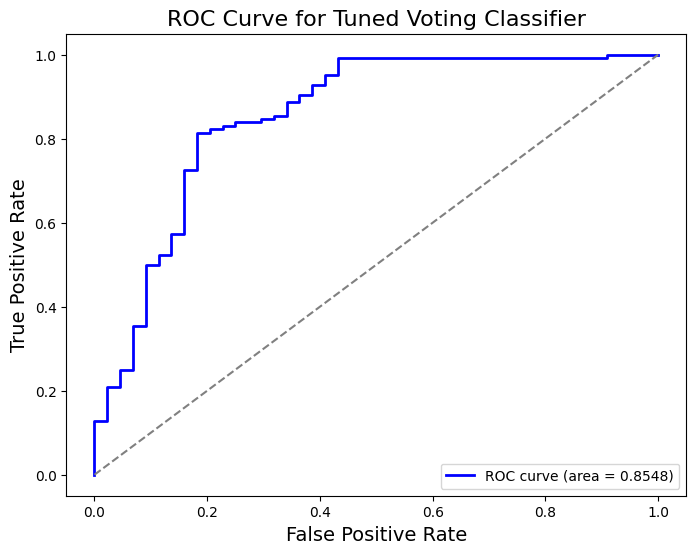

In [17]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define hyperparameter grids for individual classifiers
# Logistic Regression hyperparameters
lr_param_grid = {
    'max_iter': [100, 500, 1000],
    'C': [0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# XGBoost hyperparameters
xgb_param_grid = {
    'max_depth': [4, 6, 8],
    'eta': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150]
}

# Step 2: Perform GridSearch for Logistic Regression
lr = LogisticRegression()
lr_grid = GridSearchCV(estimator=lr, param_grid=lr_param_grid, scoring='accuracy', cv=3, verbose=1)
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression parameters:", lr_grid.best_params_)

# Step 3: Perform GridSearch for XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_grid = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, scoring='accuracy', cv=3, verbose=1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost parameters:", xgb_grid.best_params_)

# Step 4: Combine tuned classifiers into VotingClassifier
voting_clf_tuned = VotingClassifier(estimators=[('lr', best_lr), ('xgb', best_xgb)], voting='soft')

# Train the ensemble model
voting_clf_tuned.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_tuned = voting_clf_tuned.predict(X_test)

# Step 6: Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)

print(f"Tuned Voting Classifier Accuracy: {accuracy:.4f}")
print(f"Tuned Voting Classifier Precision: {precision:.4f}")
print(f"Tuned Voting Classifier Recall: {recall:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16}, linewidths=0.5)
plt.title('Confusion Matrix for Tuned Voting Classifier', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot ROC Curve
y_pred_prob_tuned = voting_clf_tuned.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Tuned Voting Classifier', fontsize=16)
plt.legend(loc='lower right')
plt.show()


Best Regularization Parameter (regParam): 0.01
Best ElasticNet Parameter (elasticNetParam): 0.0
Best Max Iterations (maxIter): 10
Tuned Model Accuracy: 0.7985


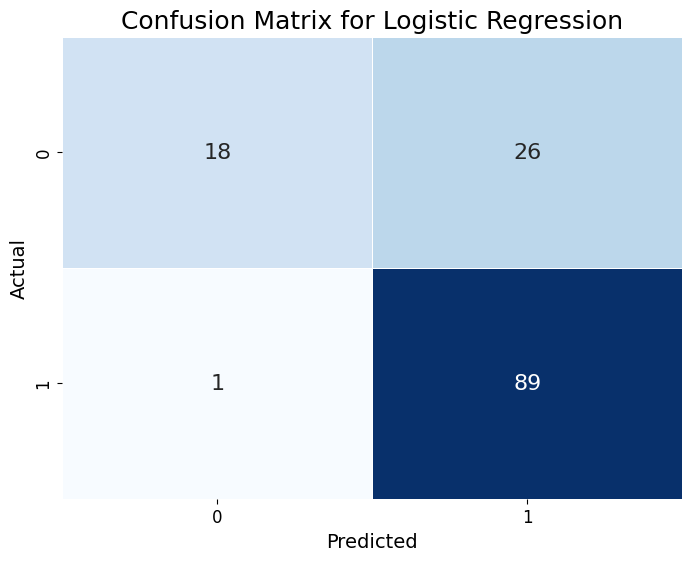

In [18]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("LogisticRegressionTuning").getOrCreate()

# Load dataset
data = spark.read.csv("C:/Users/yamin/OneDrive/Desktop/BD/CreditRisk (1).csv", header=True, inferSchema=True)

# Preprocess dataset
data = data.withColumn('Married', when(col('Married') == 'No', 0).otherwise(1))
data = data.withColumn('Education', when(col('Education') == 'Not Graduate', 0).otherwise(1))
data = data.withColumn('Self_Employed', when(col('Self_Employed') == 'No', 0).otherwise(1))
data = data.withColumn('Loan_Status', when(col('Loan_Status') == 'N', 0).otherwise(1))

# Drop unnecessary columns
data = data.drop('Loan_ID', 'Gender', 'Property_Area')

# Handle missing values
data = data.na.drop()

# Define feature columns and target variable
feature_columns = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Transform data to include feature vectors
data = assembler.transform(data)

# Rename the target column for consistency with MLlib
data = data.withColumnRenamed("Loan_Status", "categoryIndex")

# Split data into training and testing sets
trainData, testData = data.randomSplit([0.8, 0.2], seed=42)

# Initialize the Logistic Regression model
lr = LogisticRegression(labelCol="categoryIndex", featuresCol="features")

# Hyperparameter tuning using ParamGridBuilder
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.1, 1.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [10, 50, 100])
             .build())

# Evaluator for accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="categoryIndex", predictionCol="prediction", metricName="accuracy")

# Cross-validation
crossval = CrossValidator(estimator=lr, 
                          estimatorParamMaps=paramGrid, 
                          evaluator=evaluator, 
                          numFolds=3)

# Fit the model using cross-validation
cvModel = crossval.fit(trainData)

# Get the best model
bestModel = cvModel.bestModel

# Print best hyperparameters
print("Best Regularization Parameter (regParam):", bestModel._java_obj.getRegParam())
print("Best ElasticNet Parameter (elasticNetParam):", bestModel._java_obj.getElasticNetParam())
print("Best Max Iterations (maxIter):", bestModel._java_obj.getMaxIter())

# Make predictions on the test data
predictions = bestModel.transform(testData)

# Evaluate the model
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
print(f"Tuned Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
predictions_pd = predictions.select("categoryIndex", "prediction").toPandas()
conf_matrix = confusion_matrix(predictions_pd['categoryIndex'], predictions_pd['prediction'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16}, linewidths=0.5)
plt.title('Confusion Matrix for Logistic Regression', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Best Regularization Parameter (regParam): 0.001
Best ElasticNet Parameter (elasticNetParam): 0.0
Best Max Iterations (maxIter): 50
Tuned Model Accuracy: 0.7985


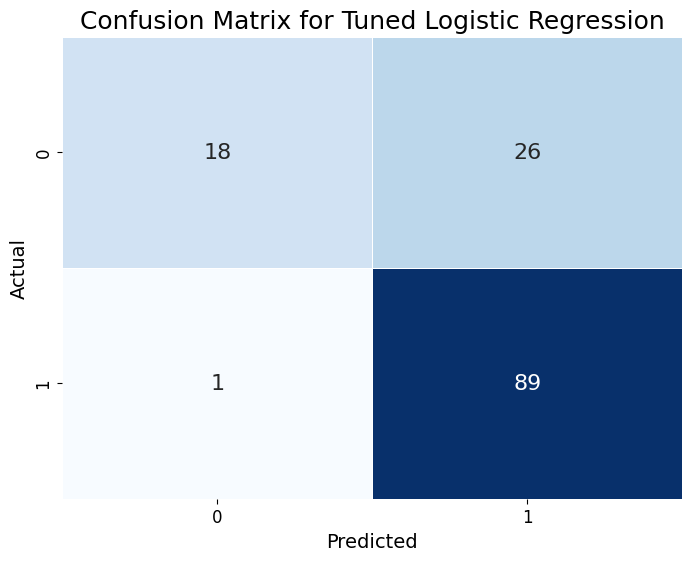

In [19]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import when, col
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialize Spark session
spark = SparkSession.builder.appName("LogisticRegressionTuning").getOrCreate()

# Load dataset
data = spark.read.csv("C:/Users/yamin/OneDrive/Desktop/BD/CreditRisk (1).csv", header=True, inferSchema=True)

# Preprocess dataset
data = data.withColumn('Married', when(col('Married') == 'No', 0).otherwise(1))
data = data.withColumn('Education', when(col('Education') == 'Not Graduate', 0).otherwise(1))
data = data.withColumn('Self_Employed', when(col('Self_Employed') == 'No', 0).otherwise(1))
data = data.withColumn('Loan_Status', when(col('Loan_Status') == 'N', 0).otherwise(1))

# Drop unnecessary columns
data = data.drop('Loan_ID', 'Gender', 'Property_Area')

# Handle missing values
data = data.na.drop()

# Define feature columns and target variable
feature_columns = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='unscaled_features')

# Create feature vectors
data = assembler.transform(data)

# Standardize the features
scaler = StandardScaler(inputCol="unscaled_features", outputCol="features", withStd=True, withMean=True)
data = scaler.fit(data).transform(data)

# Rename the target column for consistency
data = data.withColumnRenamed("Loan_Status", "categoryIndex")

# Split data into training and testing sets
trainData, testData = data.randomSplit([0.8, 0.2], seed=42)

# Initialize the Logistic Regression model
lr = LogisticRegression(labelCol="categoryIndex", featuresCol="features")

# Define a parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.001, 0.01, 0.1, 1.0])   # Regularization parameter
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])    # ElasticNet mixing parameter
             .addGrid(lr.maxIter, [50, 100, 200])             # Maximum number of iterations
             .build())

# Define evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="categoryIndex", predictionCol="prediction", metricName="accuracy")

# Cross-validation setup
crossval = CrossValidator(estimator=lr, 
                          estimatorParamMaps=paramGrid, 
                          evaluator=evaluator, 
                          numFolds=5)  # 5-fold cross-validation

# Train the model using cross-validation
cvModel = crossval.fit(trainData)

# Get the best model
bestModel = cvModel.bestModel

# Print the best hyperparameters
print("Best Regularization Parameter (regParam):", bestModel._java_obj.getRegParam())
print("Best ElasticNet Parameter (elasticNetParam):", bestModel._java_obj.getElasticNetParam())
print("Best Max Iterations (maxIter):", bestModel._java_obj.getMaxIter())

# Make predictions on the test data
predictions = bestModel.transform(testData)

# Evaluate the model
accuracy = evaluator.evaluate(predictions)
print(f"Tuned Model Accuracy: {accuracy:.4f}")

# Convert predictions to Pandas for confusion matrix
predictions_pd = predictions.select("categoryIndex", "prediction").toPandas()

# Confusion Matrix
conf_matrix = confusion_matrix(predictions_pd['categoryIndex'], predictions_pd['prediction'])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16}, linewidths=0.5)
plt.title('Confusion Matrix for Tuned Logistic Regression', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
